# Lab: Simulation + Random Variables

Today, you'll finish one more simulation and move on to exploring analysis of random variables!

# Part 0: Your Groups!
Edit the next Python cell to add information about who you're working within your lab section:

In [ ]:
# First, meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = "Sogol"
ca1_name = "Katy"
ca2_name = "Emily"


# Also, make sure to meet your team for this lab! Find out their name, what major they're in,
# and learn something new about them that you never knew before!
partner1_name = ""
partner1_major = ""
partner1_qotd_answer = ""

partner2_name = ""
partner2_major = ""
partner2_qotd_answer = ""

partner3_name = ""
partner3_major = ""
partner3_qotd_answer = ""

partner4_name = ""
partner4_major = ""
partner4_qotd_answer = ""

# Part 1: Dominion Game

### Starting Deck

One of Wade's (waf) favorite table top games in the world is Dominion.  In Dominion, each player starts with a deck of ten cards:

![starting-deck.png](starting-deck.png)

These cards are the following:

- Seven identical cards of a copper coin and
- Three identical cards of an estate

### Starting Hand

In the beginning of the game, each player:

1. Shuffles their 10-card deck and
2. Draws five of their cards

The order of the five cards do not matter (or the card itself).  Therefore, there are four possible "starting hands":

![image.png](3e2c.png)
<center>Possible Starting Hand #1: Three Estates, Two Coppers</center>

![image.png](2e3c.png)
<center>Possible Starting Hand #2: Two Estates, Three Coppers</center>

![image.png](1e4c.png)
<center>Possible Starting Hand #3: One Estate, Four Coppers</center>

![image.png](5c.png)
<center>Possible Starting Hand #4: Five Coppers</center>

## Puzzle 1: Using Statistics

Compute the probability of drawing a starting hand of all 5 coppers in the following four cells.  Remember:

- You are drawing from a 10 card deck, with two different types of cards.
- To draw all five coppers, you must **NOT** draw a single estate.
- The answer is **NOT** 0.25 (1 out of 4).  Some starting hands are more likely than others.

In [93]:
P_5coppers = (7/10)*(6/9)*(5/8)*(4/7)*(3/6)
P_5coppers 



0.08333333333333331

In [94]:
## == TEST CASES for Puzzle 1 ==
# - This read-only cell contains test cases for your previous cell(s).
# - If this cell runs without any errors in the output, you PASSED all test cases!
# - If this cell results errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert( abs((P_5coppers ** (1/4)) - 0.5372849659) < 0.0001 ), "Your P_5coppers appears to be incorrect."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()

🎉 All tests passed! 🎉



## Puzzle #2: Simulation of One Starting Hand

Finding the probability of drawing exactly one, two, or all three estates become increasingly complex.  You **DO** have the math to do it (but the equations get VERY long quickly).

Instead of calculating the number of coppers, we can simulate this in Python!  Create a **function** that simulates drawing your "starting hand" of five cards from the ten card deck.  The function will `return` the total number of coppers draw. (Hint: random.sample)

In [74]:
import random
import pandas as pd
cards = ['copper1','copper2','copper3','copper4','copper5','copper6','copper7','estate1','estate2','estate3']
def startingHandCoppers():
    copper_count = 0
    d1 = random.sample(cards, 5)
    for i in d1:
        if(i.find('copper')!=-1):
            copper_count+=1
    return copper_count
  

startingHandCoppers()



5

SyntaxError: invalid syntax (<ipython-input-147-7751b33f7e81>, line 6)

In [75]:
# Here's a cell to run to test your function:
startingHandCoppers()



3

In [76]:
## == TEST CASES for Puzzle 2 ==
# - This read-only cell contains test cases for your previous cell(s).
# - If this cell runs without any errors in the output, you PASSED all test cases!
# - If this cell results errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
has2 = False
has3 = False
has4 = False
has5 = False

for i in range(10000):
    v = startingHandCoppers()
    if (v == 2): has2 = True
    elif (v == 3): has3 = True
    elif (v == 4): has4 = True
    elif (v == 5): has5 = True
    else: assert( False ), f"Your starting hand had {v} coppers, this is not possible. :("
    
    if (has2 and has3 and has4 and has5): break

assert( has2 ), "Your starting hand never had 2 coppers. It is possible to have 3 estates and 2 coppers."
assert( has3 ), "Your starting hand never had 3 coppers. It is possible to have 2 estates and 3 coppers."
assert( has4 ), "Your starting hand never had 4 coppers. It is possible to have 1 estate and 4 coppers."
assert( has5 ), "Your starting hand never had 5 coppers. It is possible to have 0 estates and 5 coppers."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()

🎉 All tests passed! 🎉



## Puzzle 3: Simulation of 1,000 starting hands

Using your `startingHandCoppers()` function from Puzzle 2, simulate and store the number of coppers from at least 1,000 starting hands.  Make sure to store your coppers in a column named `coppers`.

In [152]:
# Run your simulation:
data = []

for i in range(1000):
    coppers = startingHandCoppers()
    d = {"coppers":coppers}
    data.append(d)


# Store your results as a DataFrame:
df = pd.DataFrame(data)



# Display a few random starting hands...
df.sample(5)

,coppers
266,4
846,2
157,4
488,2
558,5


### Puzzle 3.1: Building a Histogram of Coppers

Create a histogram showing the number of coppers in the starting hands you simulated.  Choose the correct number of bins to create a histogram that looks great!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013CEC3CBE08>]],
      dtype=object)

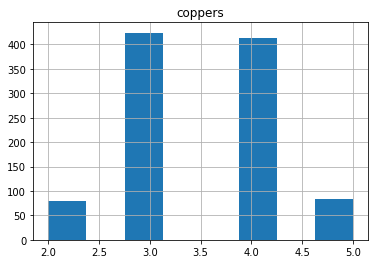

In [153]:
df.hist(bins=8)



In [154]:
## == TEST CASES for Puzzle 3 ==
# - This read-only cell contains test cases for your previous cell(s).
# - If this cell runs without any errors in the output, you PASSED all test cases!
# - If this cell results errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert( len(df) >= 1000 ), "Your simulation must have at least 1,000 observations."
assert( 'coppers' in df ), "Your simulation must have a column called `coppers`."
assert( 3 < df['coppers'].mean() < 4 ), "Your simulation should have a mean value around 3.5 -- you may want to check if your Puzzle 2 function is correct?"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()
print(f"- You have a simulation that runs {len(df)} starting hands of Dominion!")
print(f"- Simulated expected value of Coppers: {df['coppers'].mean()} coppers per starting hand")


🎉 All tests passed! 🎉

- You have a simulation that runs 1000 starting hands of Dominion!
- Simulated expected value of Coppers: 3.501 coppers per starting hand


## Puzzle 4: Your Random Variable

In your simulation, you created a random variable!  Let's call this random variable $C$:

<p><center>$C$ is the number of coppers drawn in your opening hand</center></p>

Using the histogram above, complete the following cells for the different probabilities of $C$ for various numbers of coppers. Remember! These are just probability estimates based off of your previous histogram!

In [155]:
# Probability of 2 coppers:
C_2coppers = len(df[df['coppers']==2])/1000
C_2coppers



0.079

In [156]:
# Probability of 3 coppers:
C_3coppers = len(df[df['coppers']==3])/1000
C_3coppers



0.424

In [157]:
# Probability of 4 coppers:
C_4coppers = len(df[df['coppers']==4])/1000
C_4coppers



0.414

In [158]:
# Probability of 5 coppers:
C_5coppers = len(df[df['coppers']==5])/1000
C_5coppers



0.083

#### Sanity Check

Remember, all probabilities must add up to 1!  Let's see if yours do:

In [159]:
C_all = C_2coppers + C_3coppers + C_4coppers + C_5coppers
C_all

1.0

Let's also check that your simulation matches (or nearly matches) your calculated probability:

In [160]:
# The result of this cell should be 0 or *VERY CLOSE* to 0:
P_5coppers - C_5coppers

0.0003333333333333105

In [161]:
## == TEST CASES for Puzzle 4 ==
# - This read-only cell contains test cases for your previous cell(s).
# - If this cell runs without any errors in the output, you PASSED all test cases!
# - If this cell results errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert( abs(C_2coppers + C_3coppers + C_4coppers + C_5coppers - 1.0) < 0.001 ), "Your probabilities must add up to 1.0!"
assert( abs(P_5coppers - C_5coppers) < 0.05), "The probability from your simulation must closely match the expected result (from Puzzle #1)"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")


🎉 All tests passed! 🎉


## Puzzle 5: Statistics on C

Based on what you developed for $C$, find the mean for $C$.  In other words, find the expected value. The formula is on your note sheet from lecture. 

In [162]:
# mean for $C$:
C_mean = 2*C_2coppers + 3*C_3coppers+ 4*C_4coppers+ 5*C_5coppers
C_mean

#correct answer but test case too strict




3.501

In [163]:
## == TEST CASES for Puzzle 5 ==
# - This read-only cell contains test cases for your previous cell(s).
# - If this cell runs without any errors in the output, you PASSED all test cases!
# - If this cell results errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert( abs(C_mean-3.5) < 0.001 ), "Double check your formula for C_mean!"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")


🎉 All tests passed! 🎉


## Submit Your Work :)

Make sure to **Save and Checkpoint** your notebook, exit Jupyter, and submit your work! :)